In [60]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this part we will select feature with different methods that are feature selection with correlation, 
univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) 
and tree based feature selection. We will use random forest classification in order to train our model and predict.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
bcd=pd.read_csv('data.csv')
bcd.shape
bcd.columns
bcd.head(5)

(569, 33)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# 1) Feature selection with correlation and random forest classification

As we can see from the heatmaps, some variebles correlated with each other, and we can just choose some from them.

In [63]:
y = bcd.diagnosis
drop_list = ['Unnamed: 32','id','diagnosis']
x = bcd.drop(list,axis = 1 )
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst',
              'compactness_se','concave points_se','texture_worst','area_worst']
x_1=x.drop(drop_list1,axis=1)
x_1.shape

(569, 16)

After drop some variebles, we make a new heatmap again.

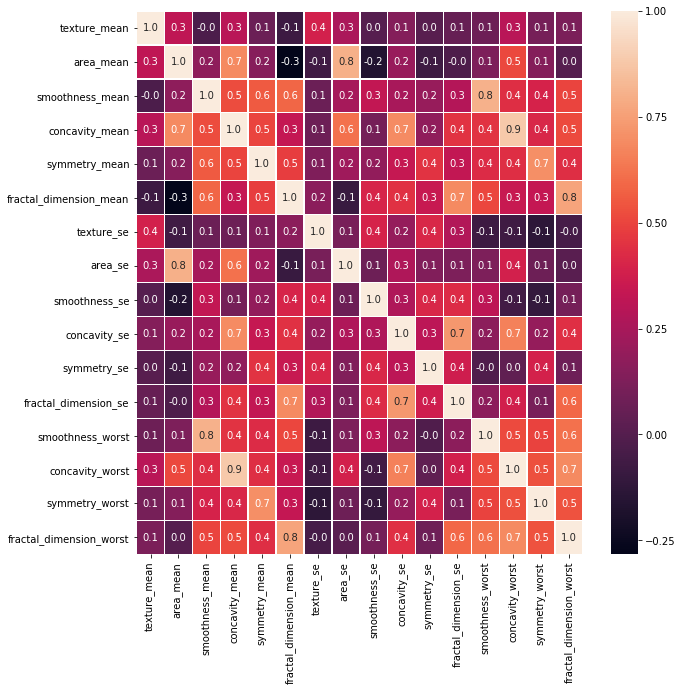

In [64]:
#new correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Lets use random forest and find accuracy according to chosen features to make sure whether the varieble we chosen are correct.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

split data train 70 % and test 30 %

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x_1, y, test_size=0.3,random_state=42)

#random forest classifier with n_estimators=10 (default)

In [87]:
rf = RandomForestClassifier(random_state=43)      
rf = rf.fit(x_train,y_train)

In [88]:
ac = accuracy_score(y_test,rf.predict(x_test))
ac

0.9532163742690059

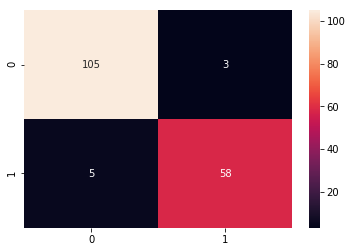

In [89]:
cm = confusion_matrix(y_test,rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is almost 96.49% and as it can be seen in confusion matrix.

#  2) Univariate feature selection and random forest classification

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features. http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


#Best 5 feature to classify is that area_mean, area_se, texture_mean, concavity_worst and concavity_mean. So lets see what happens if we use only these best scored 5 feature.

Accuracy_2 is:  0.9532163742690059


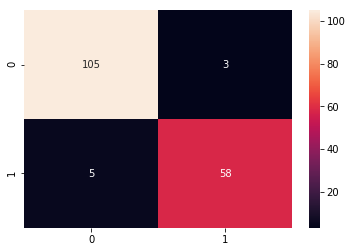

In [91]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
rf_2 = RandomForestClassifier()      
rf_2 = rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,rf_2.predict(x_test_2))
print('Accuracy_2 is: ',ac_2)
cm_2 = confusion_matrix(y_test,rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

Accracy is almost 97.08% and as it can be seen in confusion matrix. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar. Now lets see other feature selection methods to find better results.

# 3) Recursive feature elimination (RFE) with random forest

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

In [92]:
# choose 5 features
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
rf_3 = RandomForestClassifier()
rfe = RFE(estimator=rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [93]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['texture_mean', 'area_mean', 'concavity_mean', 'area_se',
       'concavity_worst'],
      dtype='object')


5 best features by rfe are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate 
accuracy again. Shortly, we can say that we make good feature selection with rfe and selectkBest methods. However as 
you can see there is a problem, okey I except we find best 5 feature with two different method and these features are 
same but why it is 5. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how 
many feature we need to use with rfecv method.

# 4) Recursive feature elimination with cross validation and random forest classification

http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html Now we will not only find best features but we also find how many features do we need for best accuracy.

In [94]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 15
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

Text(0.5,0,'Number of features selected')

Text(0,0.5,'Cross validation score of number of selected features')

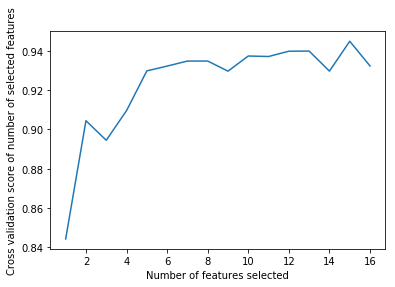

In [95]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


# 5) Tree based feature selection and random forest classification

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html In random forest classification method there is a featureimportances attributesthat is the feature importances (the higher, the more important the feature). !!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

Feature ranking:
1. feature 7 (0.251129)
2. feature 1 (0.177840)
3. feature 3 (0.130836)
4. feature 9 (0.086982)
5. feature 13 (0.085743)
6. feature 14 (0.070431)
7. feature 2 (0.037620)
8. feature 0 (0.027559)
9. feature 12 (0.024703)
10. feature 15 (0.019872)
11. feature 8 (0.019502)
12. feature 10 (0.017817)
13. feature 5 (0.017468)
14. feature 11 (0.014498)
15. feature 6 (0.011000)
16. feature 4 (0.007000)


<Figure size 1008x936 with 0 Axes>

Text(0.5,1,'Feature importances')

<BarContainer object of 16 artists>

([<matplotlib.axis.XTick at 0x1a1d9e1f60>,
 <a list of 16 Text xticklabel objects>)

(-1, 16)

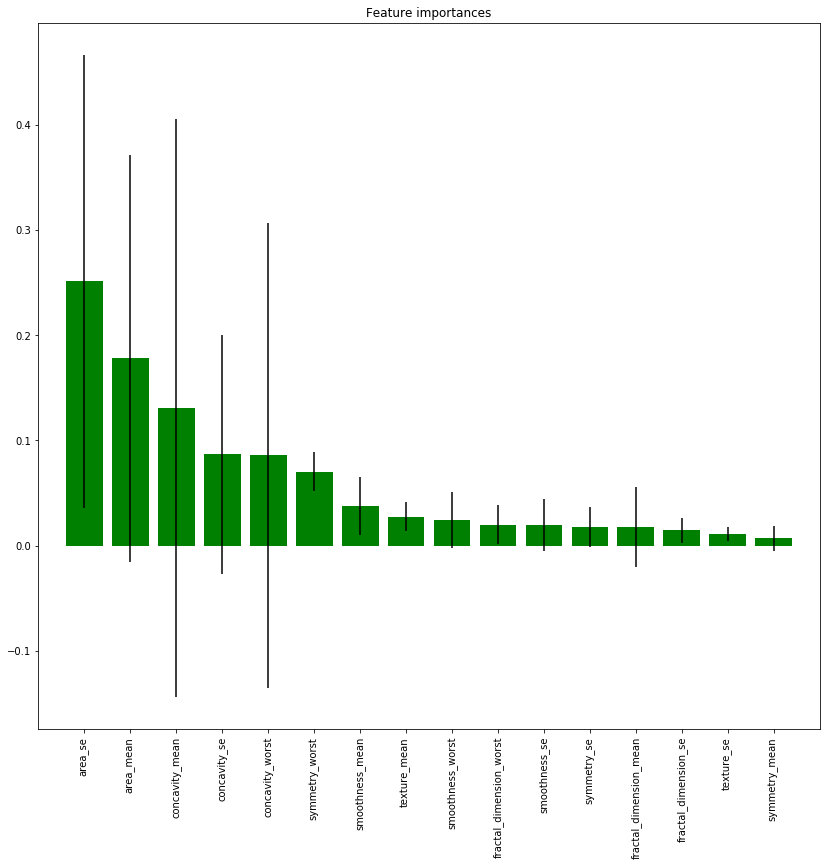

In [145]:
rf_5 = RandomForestClassifier()      
rf_5 = rf_5.fit(x_train,y_train)
importances = rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can seen in plot above, after 5 best features importance of features decrease. Therefore we can focus these 5 features.

# Conclusion

Default data includes 33 feature but after feature selection we drop this number from 33 to 5 with accuracy 95%.